# Dataset de Precios de Casas - EDA y Pipelines de Preprocesamiento

## Introducción

En este notebook realizaremos un análisis exploratorio de datos (EDA) sobre un dataset de ventas de casas en Washington, USA, seguido de la construcción de pipelines de preprocesamiento para variables numéricas y categóricas.

El dataset contiene información sobre ventas de casas incluyendo precio, tamaño, ubicación y diversas características de las propiedades. El objetivo es predecir el precio de venta basándose en las características disponibles, lo que convierte esto en un problema de **_regresión_**. El dataset proviene de Kaggle: https://www.kaggle.com/datasets/rehanliaqat17/houses-prices-dataset/

Comencemos importando las librerías necesarias y cargando el dataset como un DataFrame de pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv('data.csv')
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


## Información básica y estadísticas

Podemos usar el método `.info()` para obtener una vista general del dataset, incluyendo el número de valores no nulos y los tipos de datos de cada columna.

In [3]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   str    
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   str    
 15  city           4600 non-null   str    
 16  statezip       4600 non-null   str    
 17  country        4600 non-null   str    
dtypes: float64(4), int6

De manera similar, podemos usar el método `.describe()` para obtener estadísticas resumidas de las columnas numéricas del dataset.

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


En total tenemos 18 columnas:
- **date**: Fecha de la venta de la casa
- **price**: Precio de venta de la casa (variable objetivo)
- **bedrooms**: Número de habitaciones
- **bathrooms**: Número de baños
- **sqft_living**: Pies cuadrados de espacio habitable
- **sqft_lot**: Pies cuadrados del terreno
- **floors**: Número de pisos
- **waterfront**: Si la propiedad tiene vista al agua (0 = No, 1 = Sí)
- **view**: Calidad de la vista (0 a 4)
- **condition**: Condición de la casa (1 a 5)
- **sqft_above**: Pies cuadrados sobre el nivel del suelo
- **sqft_basement**: Pies cuadrados del sótano
- **yr_built**: Año de construcción
- **yr_renovated**: Año de la última renovación (0 si nunca fue renovada)
- **street**: Dirección de la calle
- **city**: Ciudad donde se ubica la casa
- **statezip**: Estado y código postal
- **country**: País (todos los valores son USA)

En el análisis, ignoraremos las columnas `date`, `street`, `statezip` y `country`, ya que `date` no es directamente relevante para predecir el precio, `street` tiene valores únicos para cada propiedad, `statezip` tiene alta cardinalidad, y `country` tiene el mismo valor (USA) para todas las entradas.

## Visualización de Variables Numéricas

Procedemos a visualizar las distribuciones de las principales variables numéricas del dataset.

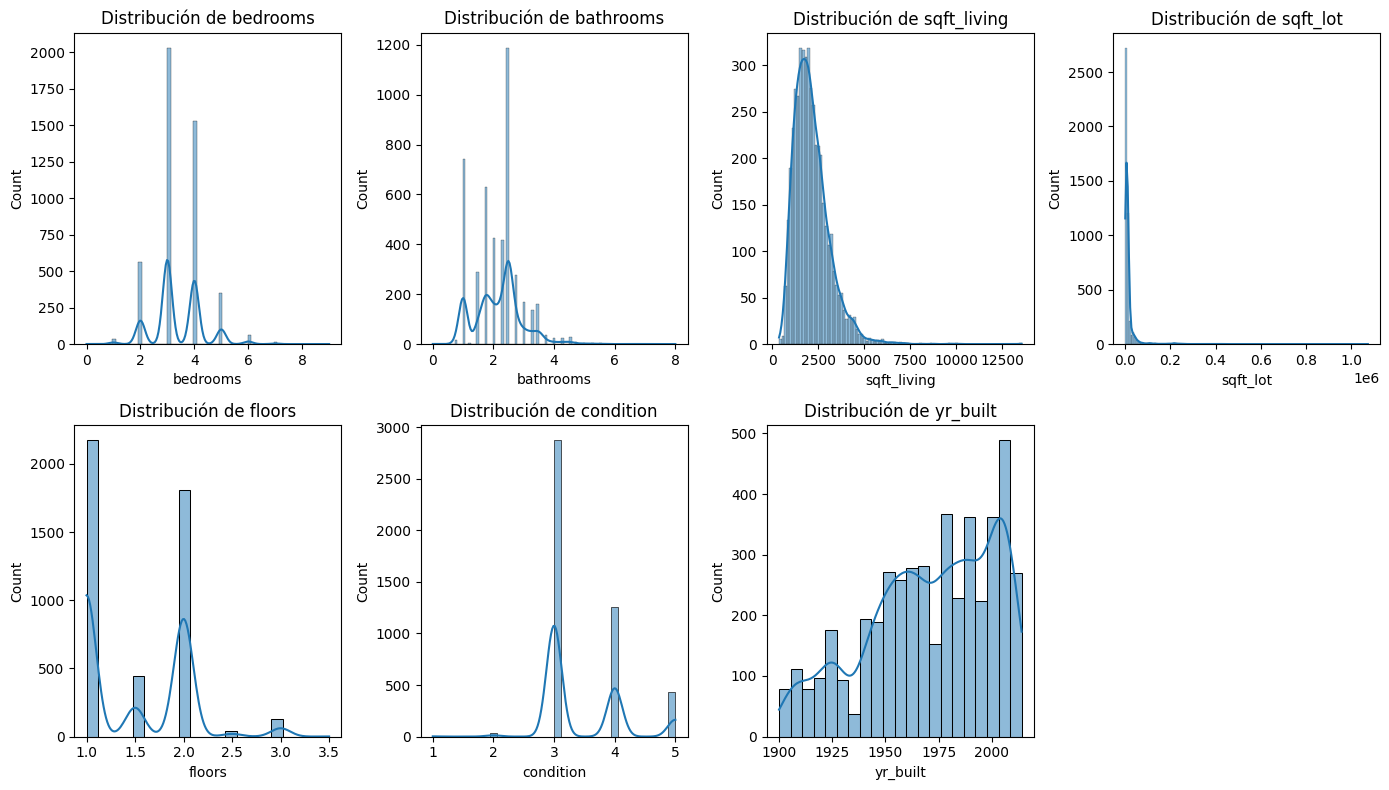

In [5]:
numerical_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'yr_built']

fig, axs = plt.subplots(2, 4, figsize=(14, 8))
axs = axs.ravel()

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribución de {col}')

axs[-1].axis('off')  # Ocultar el último subplot vacío
fig.tight_layout()

Como se puede observar, las distribuciones de las variables numéricas varían significativamente. Las variables `sqft_living` y `sqft_lot` tienen sesgo hacia la izquierda. La mayoría de las casas tienen 3-4 habitaciones y fueron construidas entre 1950-2010. La columna `condition` muestra que la mayoría de las casas están en condición 3 (promedio).

Debemos aplicar técnicas de escalado a nuestras variables numéricas para asegurar que estén en una escala similar, ya que tienen rangos de valores muy diferentes.

## Visualización de Variables Categóricas

Ahora la distribución de la variable categórica `city` usando un countplot. Mostramos solo las 10 ciudades principales por frecuencia.

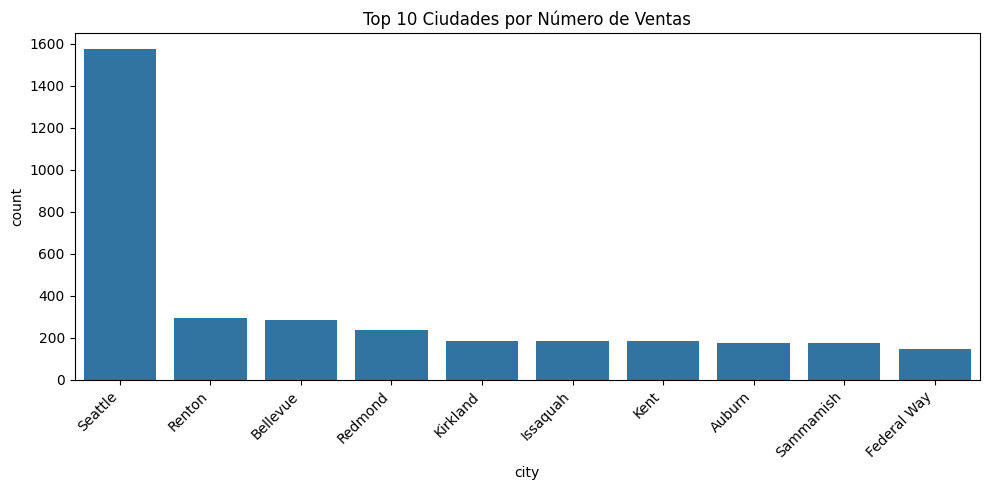

In [6]:
categorical_cols = ['city']

top_cities = data['city'].value_counts().head(10).index

fig = plt.figure(figsize=(10, 5))
sns.countplot(data=data[data['city'].isin(top_cities)], x='city', order=top_cities)
plt.title('Top 10 Ciudades por Número de Ventas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

Seattle tiene por mucho la mayor cantidad de ventas de casas en el dataset, seguida por otras ciudades de la región como Bellevue, Renton y Kent.

## Distribución de la Variable Objetivo

Visualicemos la distribución de la variable objetivo, `price`, para entender sus características.

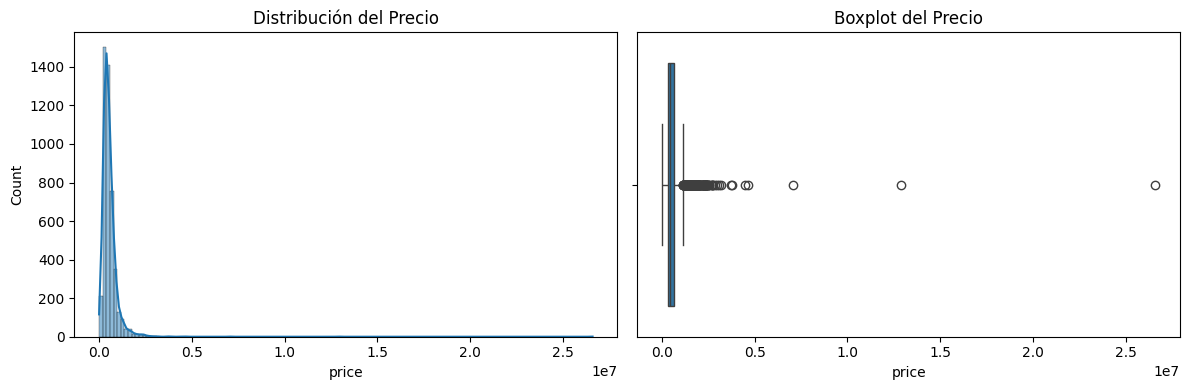

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data['price'], kde=True, ax=axs[0])
axs[0].set_title('Distribución del Precio')

sns.boxplot(x=data['price'], ax=axs[1])
axs[1].set_title('Boxplot del Precio')

fig.tight_layout()

La distribución del precio tiene un fuerte sesgo hacia la izquierda, con la mayoría de las casas con precio menor a $1 millón, pero hay algunos valores que alcanzan varios millones de dólares.

## Análisis de Correlación

Podemos usar un mapa de calor de la matriz de correlación para visualizar las correlaciones entre las columnas numéricas y la variable objetivo `price`.

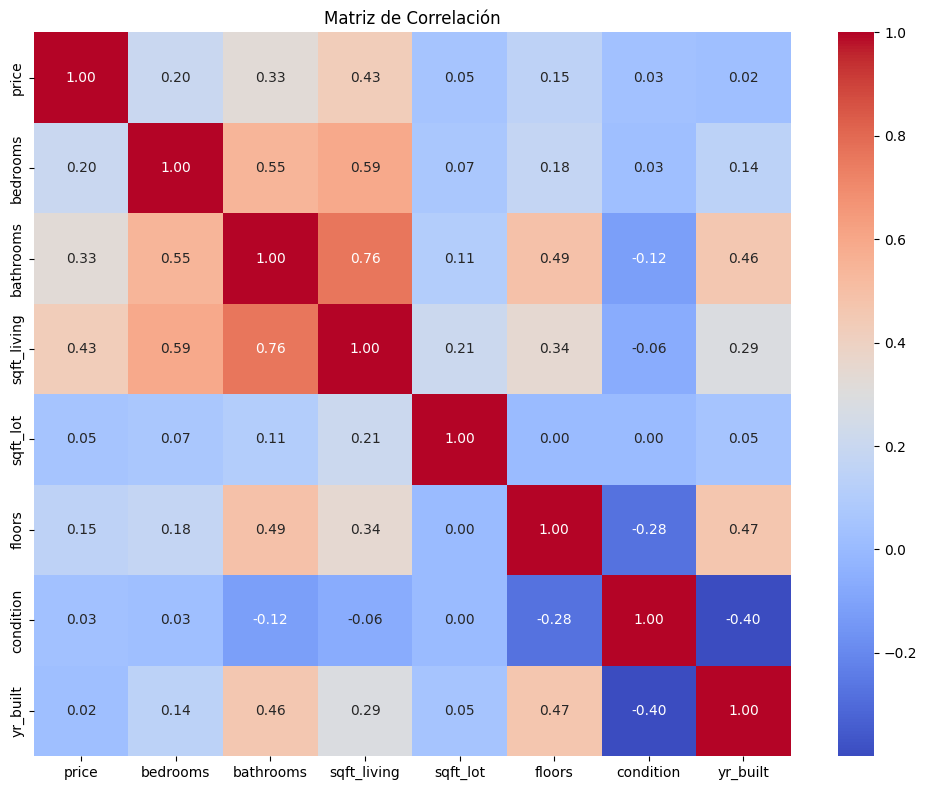

In [8]:
corr_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'yr_built']
corr_matrix = data[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.tight_layout()

Las correlaciones más fuertes con `price` son:
- `sqft_living` (0.43): Mayor espacio habitable se correlaciona con precios más altos
- `bathrooms` (0.33): Más baños se correlaciona con precios más altos
- `bedrooms` (0.2): Más habitaciones se correlaciona moderadamente con precios más altos

`sqft_lot` y `yr_built` tienen correlaciones débiles con el precio.

## Manejo de Valores Faltantes

Antes de construir los pipelines de preprocesamiento, es importante analizar los valores faltantes en el dataset.

In [9]:
missing_percent = data.isnull().mean() * 100
missing_percent.sort_values(ascending=False)

date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
street           0.0
city             0.0
statezip         0.0
country          0.0
dtype: float64

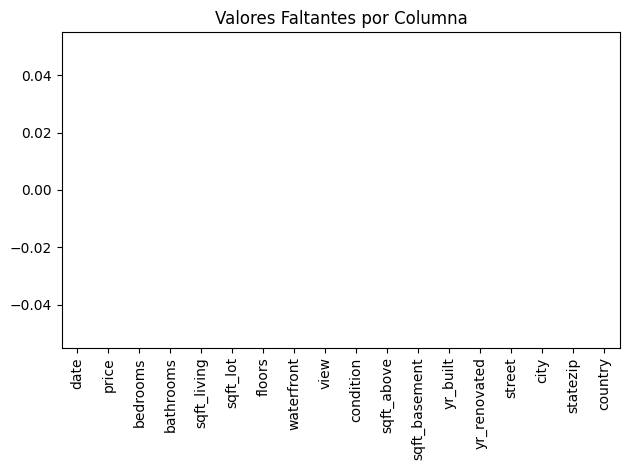

In [10]:
missing_counts = data.isnull().sum()
missing_counts.plot(kind='bar')
plt.title('Valores Faltantes por Columna')
plt.tight_layout()

El dataset no tiene ningún valor faltante.

## Hallazgos Principales

De nuestro EDA, podemos resumir los siguientes hallazgos clave:

1. **Tamaño del dataset**: El dataset contiene registros de ventas de casas con 18 variables.
2. **Variable objetivo**: La distribución del precio tiene sesgo hacia la izquierda con valores atípicos en el rango de precios altos.
3. **Predictores clave**: `sqft_living`, `bathrooms` y `bedrooms` tienen las correlaciones más fuertes con el precio.
4. **Variables categóricas**: Seattle domina los datos de ventas. La columna `city` será codificada con one-hot encoding.
5. **Valores faltantes**: El dataset no tiene valores faltantes.

## Pipelines de Preprocesamiento

Ahora que hemos analizado el dataset, podemos proceder a construir pipelines de preprocesamiento para variables numéricas y categóricas.

Aplicaremos las siguientes transformaciones:
- **Columnas con sesgo** (`sqft_living`, `sqft_lot`): Aplicar PowerTransformer para reducir el sesgo y hacer la distribución más gaussiana, seguido de escalado estándar.
- **Columnas numéricas regulares** (`bedrooms`, `bathrooms`, `floors`, `condition`, `yr_built`): Escalado estándar para normalizar los diferentes rangos.
- **Columna categórica** (`city`): One-hot encoding para convertir a formato numérico.

In [11]:
# Columnas con sesgo que requieren PowerTransformer
skewed_cols = ['sqft_living', 'sqft_lot']

# Columnas numéricas regulares
regular_num_cols = ['bedrooms', 'bathrooms', 'floors', 'condition', 'yr_built']

preprocessing_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('num_skewed', make_pipeline(SimpleImputer(strategy='mean'), PowerTransformer(), StandardScaler()), skewed_cols),
            ('num', make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()), regular_num_cols),
            ('cat', make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore')), categorical_cols),
        ]
    )
)

Definimos las variables y dividimos el dataset en conjuntos de entrenamiento y prueba. Usaremos una división 80-20.

In [12]:
X = data[skewed_cols + regular_num_cols + categorical_cols]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(f'Tamaño del conjunto de entrenamiento: {len(X_train)}')
print(f'Tamaño del conjunto de prueba: {len(X_test)}')

Tamaño del conjunto de entrenamiento: 3680
Tamaño del conjunto de prueba: 920


## Construcción del Modelo de Regresión

Ahora que tenemos nuestro pipeline de preprocesamiento configurado, podemos construir un modelo de regresión usando Regresión Lineal. Crearemos un pipeline completo que incluye tanto los pasos de preprocesamiento como el modelo.

In [14]:
regression_model = make_pipeline(
    preprocessing_pipeline,
    LinearRegression()
)

In [15]:
regression_model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pipeline', ...), ('linearregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'

Ahora podemos ajustar el modelo a los datos de entrenamiento usando el método `fit`.

In [16]:
regression_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pipeline', ...), ('linearregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'

Con nuestro modelo entrenado, ahora podemos hacer predicciones sobre el conjunto de prueba usando el método `predict`.

In [17]:
y_test_pred = regression_model.predict(X_test)
y_test_pred

array([ 458812.1946365 ,  284000.78742458,  987900.23629359,
        464506.77124303,  265694.5672271 ,  620208.31594618,
        715852.15338739,  306594.89664584,  649305.6020032 ,
        985622.71249977,  560434.12955598,  319223.22422697,
        979687.36695406,  289488.61324943,  281920.32545916,
        871793.92168695,  740706.91684972,  599981.20548908,
        879317.47973141,  842291.86290131,  873374.2640761 ,
        559795.55351614,  711428.2575698 ,  529138.79246252,
        184741.55006663,  -67296.72223287,  913321.08325567,
       1216179.84174309,  363164.98576418,  870210.44999538,
       1332039.50479973,  308264.98120433, 1388217.50085146,
        325054.24909338,   75592.43746698,  542021.58499979,
        608189.53319662,  877351.01750604,   28867.73060967,
        581455.61746703,  390025.07523923,  418137.56451271,
        337516.50341506,  850562.596079  ,  172343.23299165,
        414611.38506399,  309202.2713404 ,  640160.02767619,
       1209769.259567  ,

Finalmente, podemos crear un DataFrame que muestre tanto los precios predichos como los reales lado a lado para cada casa en el conjunto de prueba.

In [18]:
results = X_test.copy()
results['Precio_Predicho'] = y_test_pred
results['Precio_Real'] = y_test.values
results

,sqft_living,sqft_lot,bedrooms,bathrooms,floors,condition,yr_built,city,Precio_Predicho,Precio_Real
3683,1460,1613,3.0,2.50,2.0,3,2007,Seattle,458812.194637,544000.0
4411,2000,7900,5.0,2.25,1.0,4,1986,SeaTac,284000.787425,0.0
2584,2940,5432,3.0,3.25,3.0,4,1978,Seattle,987900.236294,1712500.0
69,2200,7350,3.0,2.50,1.0,5,1988,Renton,464506.771243,365000.0
1844,1720,8755,3.0,2.50,1.0,3,1983,Federal Way,265694.567227,275000.0
...,...,...,...,...,...,...,...,...,...,...
1612,1700,8400,3.0,1.75,1.0,3,1947,Seattle,556432.614096,750000.0
1068,1930,6120,5.0,2.00,1.5,3,1941,Seattle,552192.009585,230000.0
4350,1180,7793,3.0,2.00,1.0,4,1992,Kent,61879.369570,26590000.0
3027,2370,10083,4.0,2.50,2.0,5,1966,Kirkland,770177.619653,687000.0


## Comparación de Predicciones vs Valores Reales

Visualicemos la comparación entre los precios predichos por el modelo y los precios reales. Entre más cerca de la línea roja, mejor la predicción.

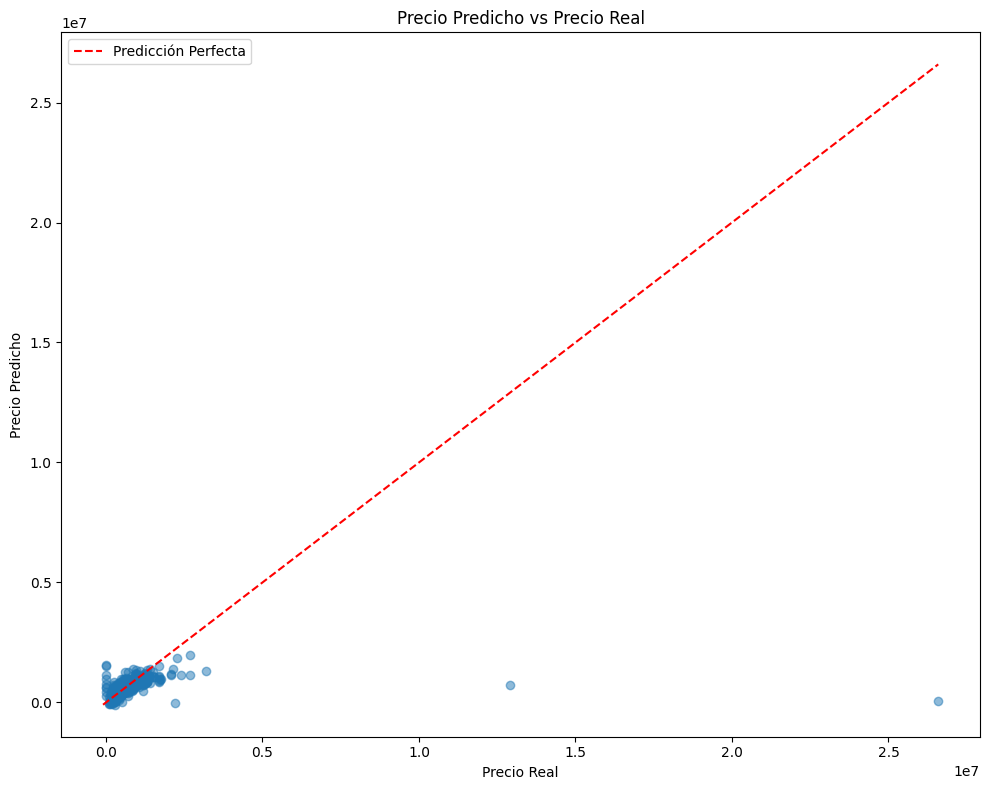

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))

# Gráfico de dispersión
ax.scatter(y_test, y_test_pred, alpha=0.5)

# Línea de referencia (predicción perfecta)
max_val = max(y_test.max(), y_test_pred.max())
min_val = min(y_test.min(), y_test_pred.min())
ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Predicción Perfecta')

ax.set_xlabel('Precio Real')
ax.set_ylabel('Precio Predicho')
ax.set_title('Precio Predicho vs Precio Real')
ax.legend()

plt.tight_layout()